### **DOWLOAD THE KAGGLE CALTECH256 DATASET**

In [ ]:
# Using opendatasets to download the dataset from https://www.kaggle.com/jessicali9530/caltech256 .
!pip install opendatasets
import opendatasets as od
dataset_url = 'https://www.kaggle.com/jessicali9530/caltech256'

# Set up Kaggle API credentials
import os
os.environ["KAGGLE_USERNAME"] = "anirudhk1997"
os.environ["KAGGLE_KEY"] = "1bbb38ef430f0a82438e4a99705b6b98"

# Downloading the dataset
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

In [ ]:
import shutil

# Define paths
original_dir = "./caltech256/256_ObjectCategories"
work_dir = "./work_directory"

# Check if working directory already exists
if not os.path.exists(work_dir):
    # Create a working directory (copy of original directory)
    shutil.copytree(original_dir, work_dir)
    print("Working directory created successfully.")
else:
    print("Working directory already exists.")

# Verify copied files
print("First 5 Files in original directory:")
print(os.listdir(original_dir)[:5])
print("First 5 Files in working directory:")
print(os.listdir(work_dir)[:5])

Working directory created successfully.
Files in original directory:
['241.waterfall', '127.laptop-101', '053.desk-globe', '256.toad', '041.coffee-mug']
Files in working directory:
['241.waterfall', '127.laptop-101', '053.desk-globe', '256.toad', '041.coffee-mug']


### **EXPLORATORY DATA ANALYSIS**

**EDA1. Using torchvision: Getting the length and number of classes of the dataset, and printing first 10 and last 10 classes.**

In [ ]:
import torchvision
from torchvision.datasets import ImageFolder
dataset = ImageFolder(original_dir)
print("\n The total length of the dataset is:", len(dataset))
print("\n The total number of classes in the dataset is:", len(dataset.classes))
print("\n First 10 classes are:", dataset.classes[:10])
print("\n Last 10 classes are:", dataset.classes[-10:])


 The total length of the dataset is: 30607

 The total number of classes in the dataset is: 257

 First 10 classes are: ['001.ak47', '002.american-flag', '003.backpack', '004.baseball-bat', '005.baseball-glove', '006.basketball-hoop', '007.bat', '008.bathtub', '009.bear', '010.beer-mug']

 Last 10 classes are: ['248.yarmulke', '249.yo-yo', '250.zebra', '251.airplanes-101', '252.car-side-101', '253.faces-easy-101', '254.greyhound', '255.tennis-shoes', '256.toad', '257.clutter']


**EDA2: Using Matplotlib, plot the histogram of number of images in each class.**

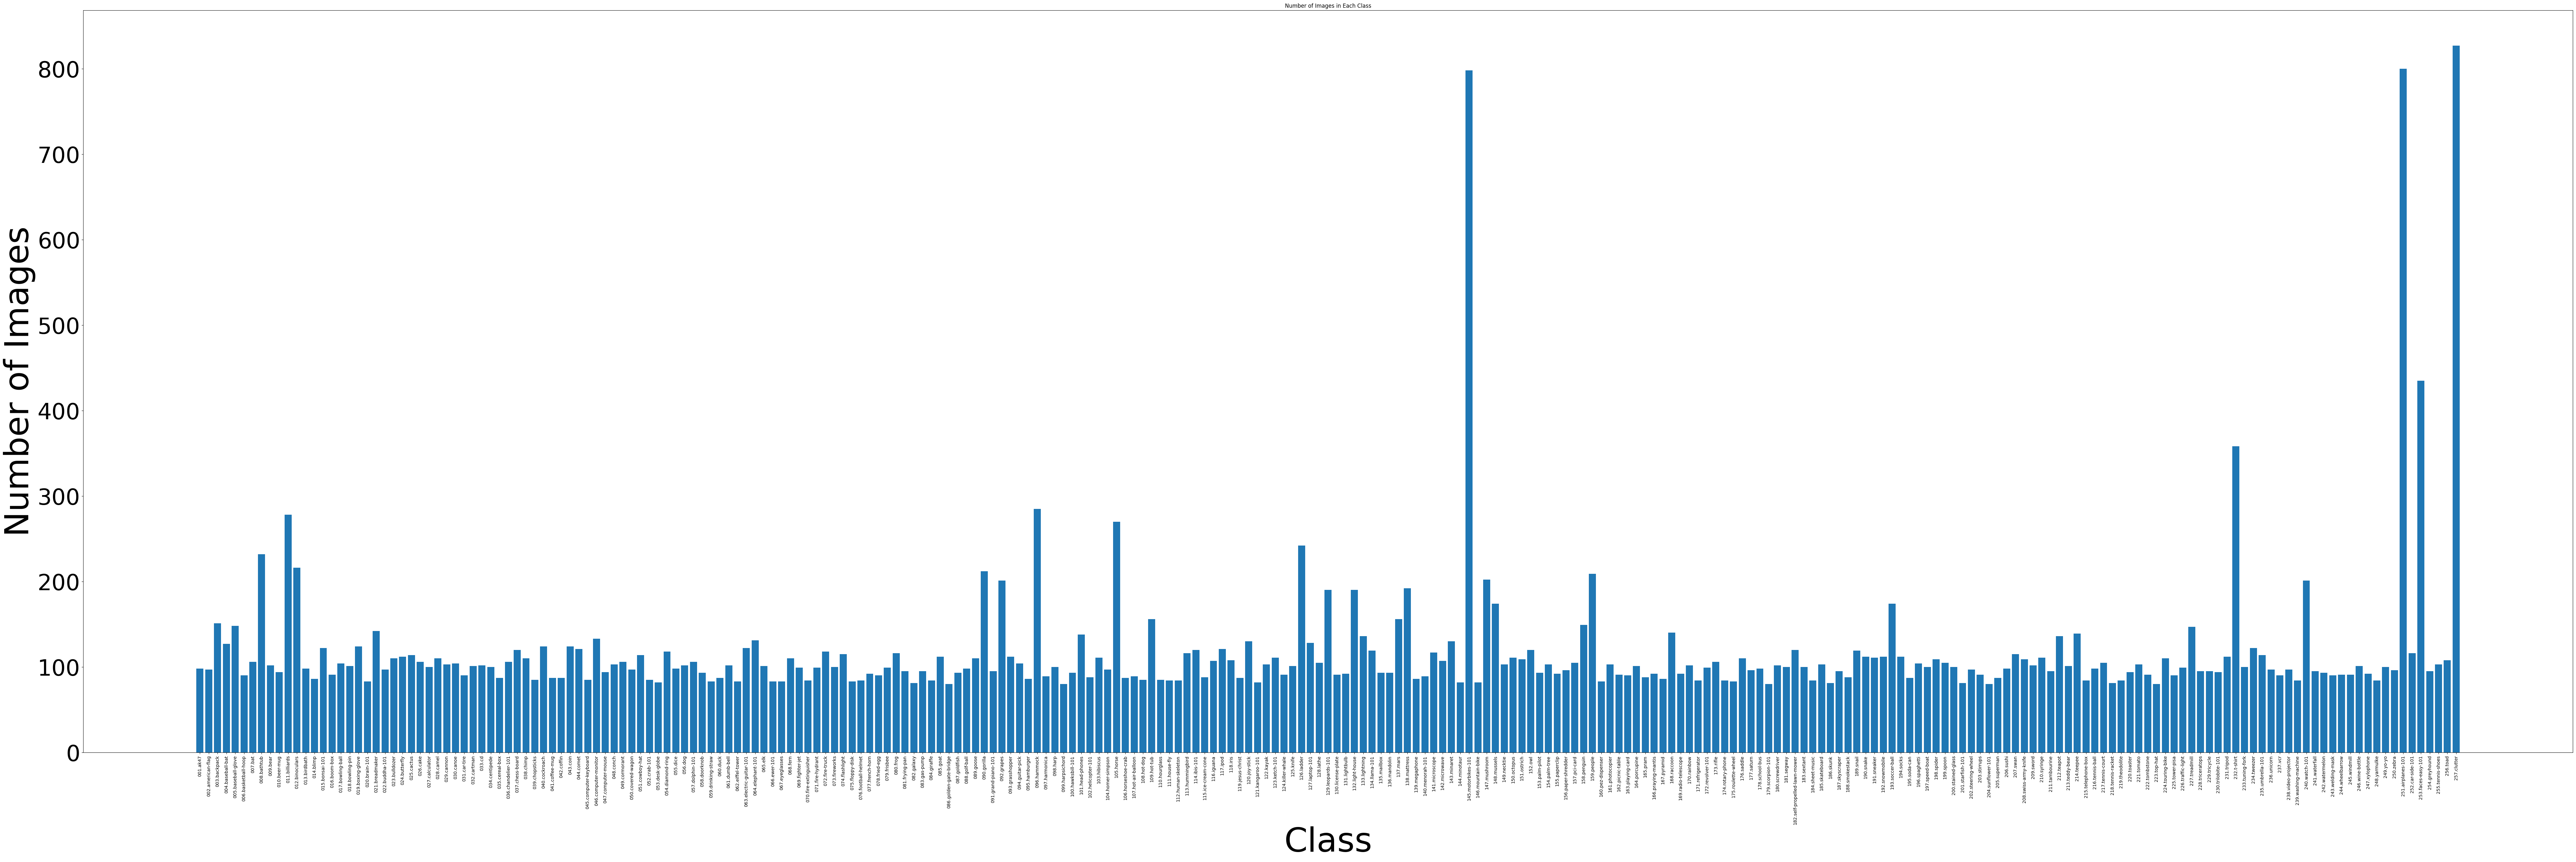

In [ ]:
# Get the list of classes and their respective folder paths
classes = dataset.classes
class_folders = [os.path.join(original_dir, class_name) for class_name in classes]

# Count the number of images in each class
images_per_class = [len(os.listdir(folder)) for folder in class_folders]

# Histogram of different classes and number of images in each class
import matplotlib.pyplot as plt
plt.figure(figsize=(100, 30))
plt.bar(classes, images_per_class)
plt.xlabel('Class', fontsize=75)
plt.ylabel('Number of Images', fontsize=75)
plt.tick_params(axis='y', labelsize=50)
plt.title('Number of Images in Each Class')
plt.xticks(rotation=90)
plt.show()

**EDA3: Using MAtplotlib, plot the histogram of number of classes in Image ranges.**

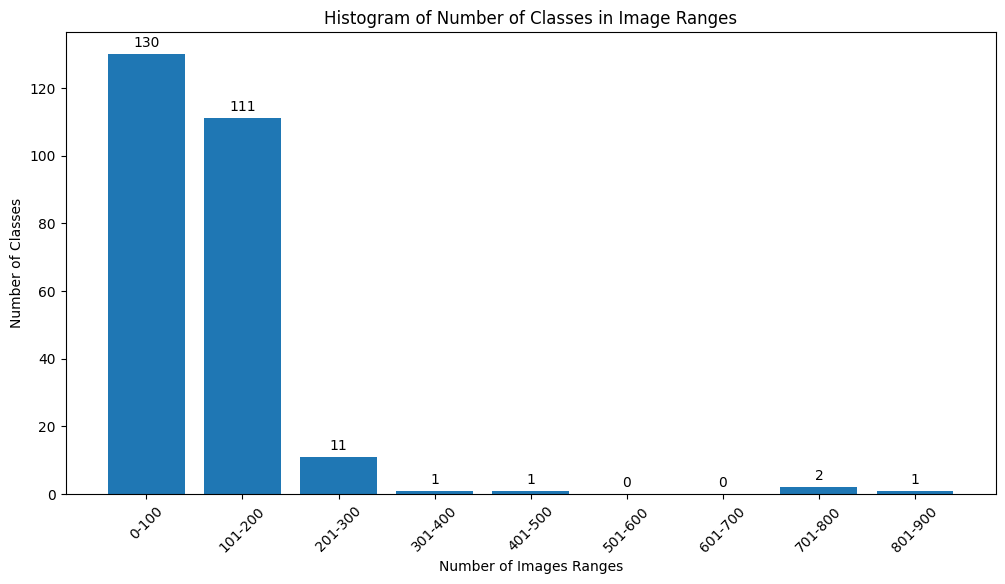

In [ ]:
import numpy as np
ranges = [(0, 100), (101, 200), (201, 300), (301, 400), (401, 500),(501, 600), (601, 700), (701, 800), (801, 900)]
count_in_ranges = np.zeros(len(ranges), dtype=int)
for count in images_per_class:
    for i, (start, end) in enumerate(ranges):
        if start <= count <= end:
            count_in_ranges[i] += 1
            break
plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(ranges)), count_in_ranges)
plt.xlabel('Number of Images Ranges')
plt.ylabel('Number of Classes')
plt.title('Histogram of Number of Classes in Image Ranges')
plt.xticks(range(len(ranges)), [f'{start}-{end}' for start, end in ranges], rotation=45)
for bar, count in zip(bars, count_in_ranges):
    plt.annotate(text=str(count),  xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
     xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
plt.show()

**EDA4: Calculating average width, height, and aspect ratio of all images.**

In [ ]:
import torchvision.transforms as tt
from PIL import Image

# Convert images to tensors and load the dataset with transformations
data_transform = tt.Compose([tt.ToTensor()])
tensor_dataset = ImageFolder(original_dir, transform=data_transform)

# List to store width, height, and aspect ratio of each image
image_dimensions = []
for path, _ in tensor_dataset.imgs:
    image = Image.open(path)
    width, height = image.size
    aspect_ratio = width / height
    image_dimensions.append((width, height, aspect_ratio))

# Print the first few entries of the list
print("\n Dimensions: The Width, Height, and Aspect Ratio of first 10 images are: \n ")
for dim in image_dimensions[:10]:
    print(dim)

# Extract lists of widths, heights, and aspect ratios from image dimensions
widths = [width for width, _, _ in image_dimensions]
heights = [height for _, height, _ in image_dimensions]
aspect_ratios = [aspect_ratio for _, _, aspect_ratio in image_dimensions]

# Print the average width, height, and aspect ratio
print("\n Average Width of the images:", np.mean(widths))
print("\n Average Height of the images:", np.mean(heights))
print("\n Average Aspect Ratio of the images:", np.mean(aspect_ratios))

print("\n 90th Percentile of Width of the images:", np.percentile(widths, 90))
print("\n 90th Percentile of Height of the images:", np.percentile(heights, 90))
print("\n 90th Percentile of Aspect Ratio of the images:", np.percentile(aspect_ratios, 90))


 Dimensions: The Width, Height, and Aspect Ratio of first 10 images are: 
 
(499, 278, 1.7949640287769784)
(268, 218, 1.2293577981651376)
(300, 186, 1.6129032258064515)
(250, 185, 1.3513513513513513)
(380, 200, 1.9)
(325, 207, 1.570048309178744)
(300, 160, 1.875)
(576, 556, 1.0359712230215827)
(400, 134, 2.985074626865672)
(528, 396, 1.3333333333333333)

 Average Width of the images: 371.2448459502728

 Average Height of the images: 325.972130558369

 Average Aspect Ratio of the images: 1.205847719993593


**EDA5: Using seaborn, plot histogram of width, height, and aspect ratio of all the images in the dataset.**

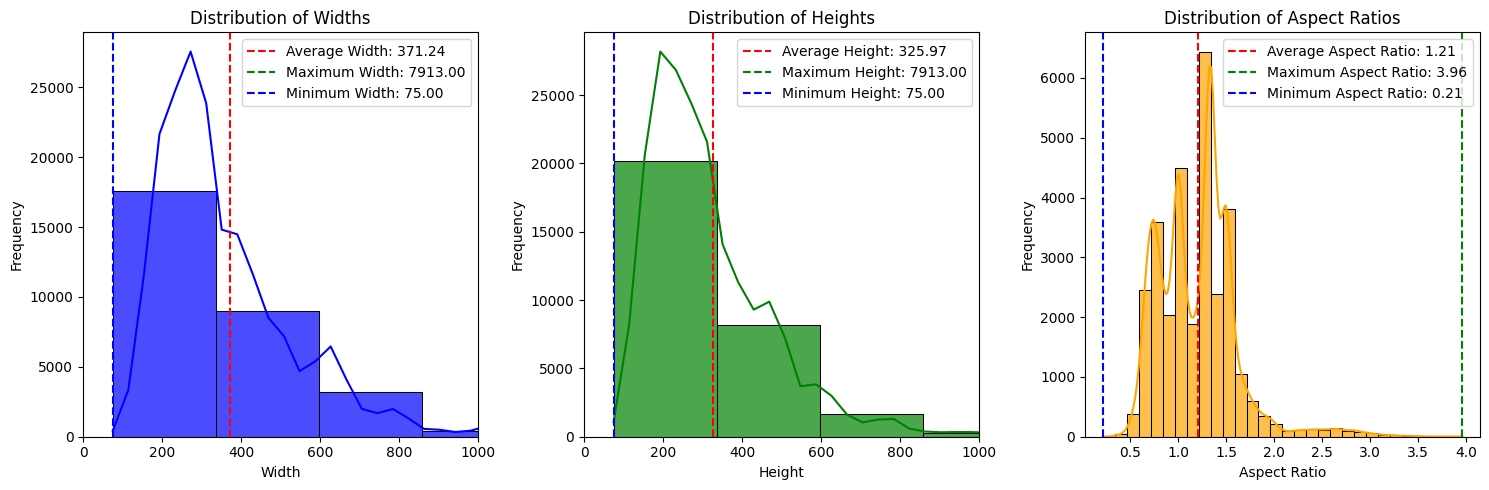

In [ ]:
import seaborn as sns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot histogram and KDE for widths
sns.histplot(widths, bins=30, kde=True, color='blue', alpha=0.7, ax=axes[0])
axes[0].axvline(x=np.max(widths), color='green', linestyle='--', label=f'Maximum Width: {np.max(widths):.2f}')
axes[0].axvline(x=np.min(widths), color='blue', linestyle='--', label=f'Minimum Width: {np.min(widths):.2f}')
axes[0].axvline(x=np.percentile(widths, 90), color='cyan', linestyle='--', label=f'90th Percentile Width: {np.percentile(widths, 90):.2f}', linewidth=2.0)
axes[0].legend(loc='upper right')
axes[0].set_title('Distribution of Widths')
axes[0].set_xlabel('Width')
axes[0].set_ylabel('Frequency')

# Plot histogram and KDE for heights
sns.histplot(heights, bins=30, kde=True, color='green', alpha=0.7, ax=axes[1])
axes[1].axvline(x=np.max(heights), color='green', linestyle='--', label=f'Maximum Height: {np.max(heights):.2f}')
axes[1].axvline(x=np.min(heights), color='blue', linestyle='--', label=f'Minimum Height: {np.min(heights):.2f}')
axes[1].axvline(x=np.percentile(heights, 90), color='cyan', linestyle='--', label=f'90th Percentile Height: {np.percentile(heights, 90):.2f}', linewidth=2.0)
axes[1].legend(loc='upper right')
axes[1].set_title('Distribution of Heights')
axes[1].set_xlabel('Height')
axes[1].set_ylabel('Frequency')

# Plot histogram and KDE for aspect ratios
sns.histplot(aspect_ratios, bins=30, kde=True, color='orange', alpha=0.7, ax=axes[2])
axes[2].axvline(x=np.max(aspect_ratios), color='green', linestyle='--', label=f'Maximum Aspect Ratio: {np.max(aspect_ratios):.2f}')
axes[2].axvline(x=np.min(aspect_ratios), color='blue', linestyle='--', label=f'Minimum Aspect Ratio: {np.min(aspect_ratios):.2f}')
axes[2].axvline(x=np.percentile(aspect_ratios, 90), color='cyan', linestyle='--', label=f'90th Percentile Aspect Ratio: {np.percentile(aspect_ratios, 90):.2f}', linewidth=2.0)
axes[2].legend(loc='upper right')
axes[2].set_title('Distribution of Aspect Ratios')
axes[2].set_xlabel('Aspect Ratio')
axes[2].set_ylabel('Frequency')

# Adjust layout and display plots
plt.tight_layout()
plt.show()

**EDA5: Using seasborn, scatter plot of image sizes for different classes of Images**

<ipython-input-10-3644b82c5d41>:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


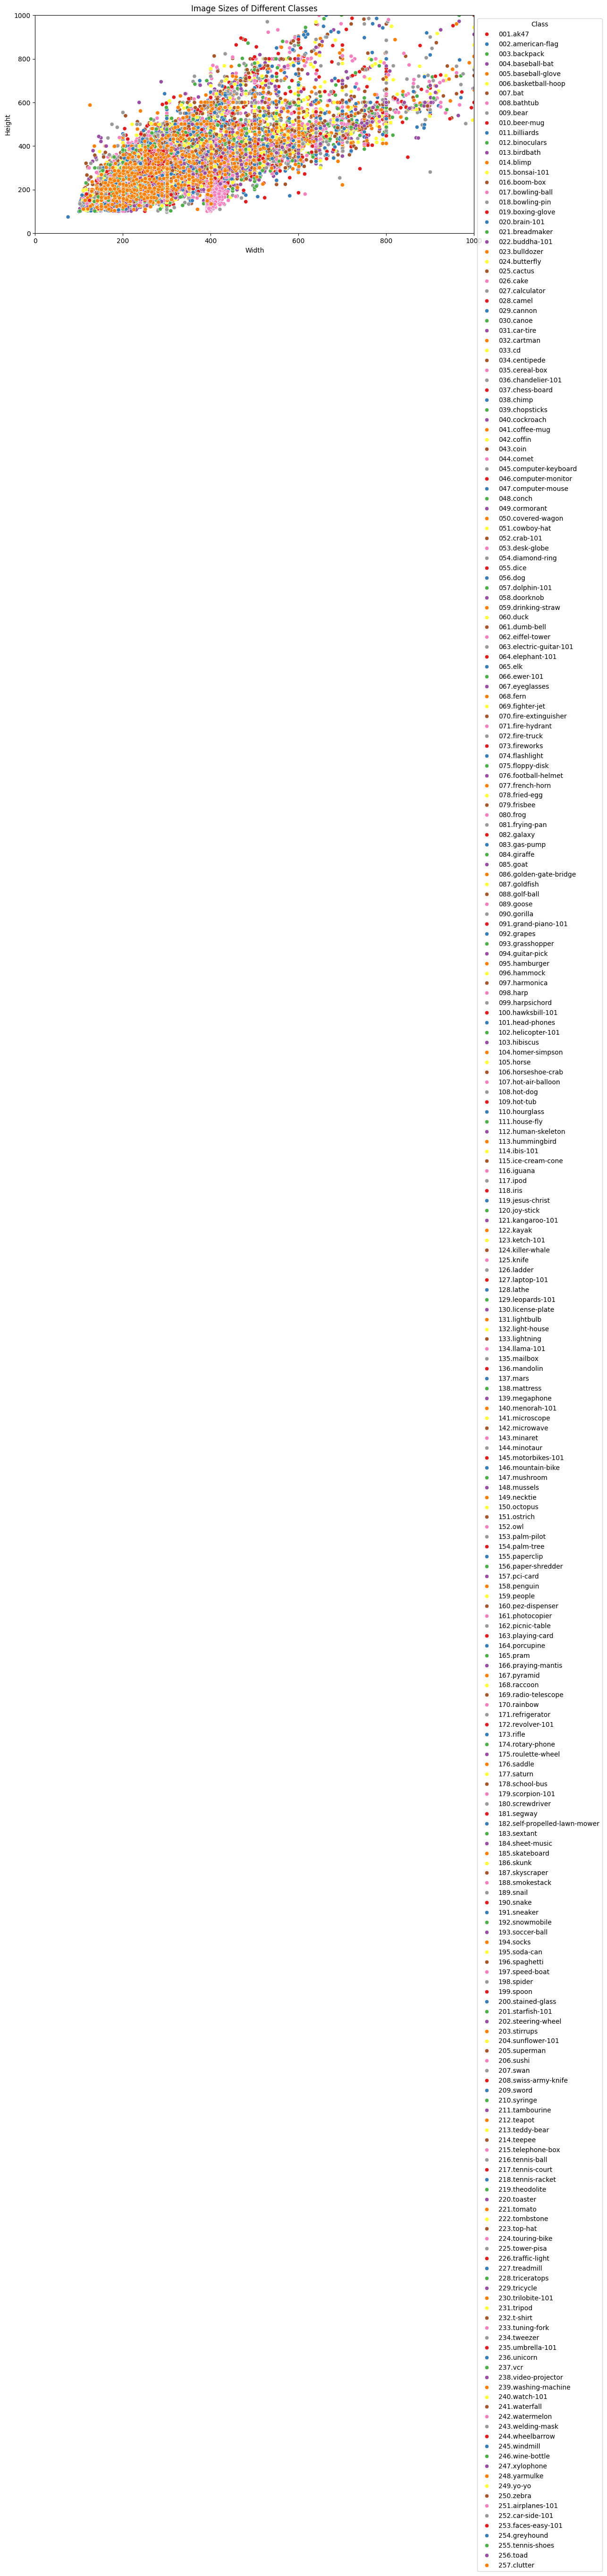

In [ ]:
# Extract class labels for each image
class_labels = [tensor_dataset.classes[idx] for idx in tensor_dataset.targets]

# Unzip image dimensions
widths, heights, aspect_ratios = zip(*image_dimensions)

# Plot scatter plot of image sizes for different classes
plt.figure(figsize=(12, 6))
sns.scatterplot(x=widths, y=heights, hue=class_labels, palette='Set1')
plt.title('Image Sizes of Different Classes')
plt.xlabel('Width')
plt.ylabel('Height')
plt.legend(title='Class', bbox_to_anchor=(1, 1), loc='upper left')
plt.xlim(0, 1000)
plt.ylim(0, 1000)
plt.tight_layout()
plt.show()

**EDA6: Printing Few Images in a Grid**

In [ ]:
import torchvision.transforms as tt
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt

# Assuming you have a dataset called 'dataset' containing images
# Define transformations to resize or crop images to a consistent size
transform = tt.Compose([
    tt.Resize((180, 300)),  # Resize images to a consistent size
    tt.ToTensor()  # Convert images to PyTorch tensors
])

# Load the dataset with transformations applied
grid_dataset = ImageFolder(original_dir, transform=transform)

# Create a data loader for the dataset
data_loader = torch.utils.data.DataLoader(grid_dataset, batch_size=48, shuffle=True)

# Fetch a batch of images from the data loader
images, _ = next(iter(data_loader))

# Create a grid of images
grid = torchvision.utils.make_grid(images[:8*6], nrow=6)

# Convert the grid to numpy array
grid_np = grid.permute(1, 2, 0).cpu().numpy()

# Display the grid of images
plt.figure(figsize=(15, 8))
plt.imshow(grid_np)
plt.axis('off')
plt.show()

### **DATA AUGMENTATION**

**Data Augmentation1. Horizontal and Vertical Flips, ColorJitter, Gaussian Blur, Random Affine with torchvision.transforms**

In [ ]:
# Define data augmentation transformations
aug_transform = tt.Compose([
    tt.RandomHorizontalFlip(),
    tt.RandomVerticalFlip(),
    tt.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    tt.GaussianBlur(kernel_size = 3, sigma=(0.1, 2.0)),
    tt.RandomAffine(degrees = (-20, 20), translate= (0.2, 0.2), scale=(0.8, 1.2), shear= (-10, 10)),
    tt.ToTensor()
])

**Data Augmentation2: Random Perspective Added**

In [ ]:
from torchvision.transforms import InterpolationMode
from torchvision.transforms import RandomPerspective

aug_transform = tt.Compose([
    tt.RandomHorizontalFlip(),
    tt.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    tt.GaussianBlur(kernel_size=3, sigma=(0.5, 2.0)),
    tt.RandomAffine(degrees=(-20, 20), translate=(0.2, 0.2), scale=(0.8, 1.2), shear=(-10, 10)),
    tt.RandomPerspective(distortion_scale=0.5, interpolation=InterpolationMode.BILINEAR),
    tt.ToTensor()

])

**Data Augmentation3:Gaussian Blur Sigma Value Changed**

In [ ]:
# Define data augmentation transformations
aug_transform = tt.Compose([
    tt.RandomHorizontalFlip(),
    tt.RandomVerticalFlip(),
    tt.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    tt.GaussianBlur(kernel_size = 3, sigma=(0.5, 2.0)),
    tt.RandomAffine(degrees = (-20, 20), translate= (0.2, 0.2), scale=(0.8, 1.2), shear= (-10, 10)),
    tt.ToTensor()
])

**Data Augmentation4:Padding and Scaling Added**

In [ ]:
aug_transform = tt.Compose([
    tt.RandomHorizontalFlip(),
    tt.RandomRotation(degrees=20),
    tt.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    tt.GaussianBlur(kernel_size=3, sigma=(0.1, 2.0)),
    tt.RandomAffine(degrees=(-20, 20), translate=(0.2, 0.2), scale=(1, 1)),
    tt.Pad(padding=10, fill=0, padding_mode='constant'),  # Add padding
    tt.ToTensor()
])

**Data Augmentation5: v2 with Elastic Transofrm, Random Invert and Adjust Sharpness**

In [ ]:
import torch
from torchvision.transforms import v2

aug_transform = v2.Compose([
    v2.RandomResizedCrop(size=(512,512),antialias=True),
    v2.RandomHorizontalFlip(),
    v2.RandomVerticalFlip(),
    v2.ElasticTransform(alpha=50, sigma=5),
    v2.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    v2.GaussianBlur(kernel_size = 3, sigma=(0.1, 2.0)),
    v2.RandomAffine(degrees = (-20, 20), translate= (0.2, 0.2), scale=(0.8, 1.2), shear= (-10, 10)),
    v2.Compose([v2.ToImage(),v2.ToDtype(torch.float32,scale=True)])
])

### **SAMPLING TO ENSURE 200 IMAGES IN EACH CLASS**

In [ ]:
import glob
import random
import shutil
# Iterate over each folder in the data directory
for category in os.listdir(work_dir):
    category_path = os.path.join(work_dir, category)

    # Check if the item in the directory is a folder
    if os.path.isdir(category_path):
        # List all files (samples) in the folder
        all_files = glob.glob(os.path.join(category_path, '*.jpg'))

        # Count the number of files (samples) in the folder
        num_samples = len(all_files)

        # Print the number of samples in the current folder
        print(f"Folder '{category}' contains {num_samples} samples.")

        # If the number of samples is less than 200, augment data to increase the number of samples
        if num_samples < 200:
            # Calculate the number of additional samples required
            num_additional_samples = 200 - num_samples

            # Augment existing samples to generate additional samples
            for i in range(num_additional_samples):
                # Randomly select an existing sample
                existing_sample = random.choice(all_files)

                # Load the selected sample
                img = Image.open(existing_sample)

                # Apply data augmentation
                augmented_img = aug_transform(img)

                # Convert augmented image tensor back to PIL Image
                augmented_img_pil = tt.ToPILImage()(augmented_img)

                # Save the augmented image
                num_samples += 1
                augmented_img_pil.save(os.path.join(category_path, f"augmented_{num_samples}.jpg"))

                print(f"Augmented image saved: {augmented_img_pil}")

            print(f"{num_additional_samples} additional samples added to folder '{category}'.")

        # If the number of samples is greater than 200, randomly remove extra files
        elif num_samples > 200:

            # Calculate the number of extra files
            num_extra_files = num_samples - 200

            # Randomly select extra files to remove
            files_to_remove = random.sample(all_files, num_extra_files)

            # Remove selected files
            for file_to_remove in files_to_remove:
                os.remove(file_to_remove)

            print(f"{num_extra_files} extra files removed from folder '{category}'.")

        else:
            print(f"Folder '{category}' has exactly 200 of samples.")




Folder '241.waterfall' contains 200 samples.
Folder '241.waterfall' has exactly 200 of samples.
Folder '127.laptop-101' contains 200 samples.
Folder '127.laptop-101' has exactly 200 of samples.
Folder '053.desk-globe' contains 200 samples.
Folder '053.desk-globe' has exactly 200 of samples.
Folder '256.toad' contains 200 samples.
Folder '256.toad' has exactly 200 of samples.
Folder '041.coffee-mug' contains 200 samples.
Folder '041.coffee-mug' has exactly 200 of samples.
Folder '226.traffic-light' contains 200 samples.
Folder '226.traffic-light' has exactly 200 of samples.
Folder '150.octopus' contains 200 samples.
Folder '150.octopus' has exactly 200 of samples.
Folder '057.dolphin-101' contains 200 samples.
Folder '057.dolphin-101' has exactly 200 of samples.
Folder '149.necktie' contains 200 samples.
Folder '149.necktie' has exactly 200 of samples.
Folder '039.chopsticks' contains 200 samples.
Folder '039.chopsticks' has exactly 200 of samples.
Folder '031.car-tire' contains 200 sam

**Printing the number of image samples and classes**

In [ ]:
working_dataset = ImageFolder(work_dir)
print("\n The total length of the dataset is:", len(working_dataset))
print("\n The total number of classes in the dataset is:", len(working_dataset.classes))


 The total length of the dataset is: 51400

 The total number of classes in the dataset is: 257


###**CALCULATING MEAN AND SD FOR NORMALIZATION**

In [ ]:
import torch
from torch.utils.data import DataLoader
# Define transformation to convert PIL images to tensors
transform = tt.Compose([
    tt.Resize((371,326)),
    tt.ToTensor()
])

# Define your dataset (replace DatasetFolder with the appropriate dataset class)
dataset_for_meansd = ImageFolder(work_dir, transform=transform)

# Initialize lists to store channel-wise means and standard deviations
channel_means = []
channel_stds = []

# Iterate over the dataset to compute means and standard deviations
for img, _ in dataset_for_meansd:
    # Convert the image to float tensor
    img = img.float()
    # Compute mean and standard deviation for each channel
    channel_means.append(torch.mean(img, dim=(1, 2)))
    channel_stds.append(torch.std(img, dim=(1, 2)))

# Aggregate statistics
 mean = torch.stack(channel_means).mean(dim=0)
 std = torch.stack(channel_stds).mean(dim=0)

 print("Computed Mean:", mean)
 print("Computed Std Deviation:", std)

###**RESIZING AND NORMALIZING**

In [ ]:
final_transform = tt.Compose([
    tt.Resize((512, 512),
    tt.ToTensor(),
    tt.Normalize(mean= mean, std=std)
])
augmented_dataset = ImageFolder(work_dir, transform = final_transform)

print("\n The total length of the dataset is:", len(augmented_dataset))
print("\n The total number of classes in the dataset is:", len(augmented_dataset.classes))

# Create a DataLoader to iterate over the dataset
batch_size = 1  # Set batch size to 1 to iterate over individual samples
data_loader = DataLoader(augmented_dataset, batch_size=batch_size, shuffle=False)

# Print the shapes of first 5 images in the dataset.
for i, (image, label) in enumerate(data_loader):
    if i >= 5:  # Stop after the first 5 samples
        break
    print(f"\n Image {i+1} - Shape: {image.shape}, Label: {label}")


 The total length of the dataset is: 51400

 The total number of classes in the dataset is: 257

 Image 1 - Shape: torch.Size([1, 3, 371, 326]), Label: tensor([0])

 Image 2 - Shape: torch.Size([1, 3, 371, 326]), Label: tensor([0])

 Image 3 - Shape: torch.Size([1, 3, 371, 326]), Label: tensor([0])

 Image 4 - Shape: torch.Size([1, 3, 371, 326]), Label: tensor([0])

 Image 5 - Shape: torch.Size([1, 3, 371, 326]), Label: tensor([0])


### **SPLITTING THE DATASET INTO TRAINING, AND TEST**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split, RandomSampler

# Set random seed for reproducibility
torch.manual_seed(42)
generator = torch.Generator().manual_seed(42)

# Setting the size for training and test set
train_size = int(0.8 * len(augmented_dataset))  # 80% for training
test_size = len(augmented_dataset) - train_size # 20% for testing

# Split the dataset
train_dataset, test_dataset = random_split(augmented_dataset, lengths=[train_size, test_size], generator=generator)

val_dataset = test_dataset

print("\n Total no of samples in the training dataset = ", train_size)
print("\n Total no of samples in the test dataset = ", test_size)

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
val_loader = test_loader

###**USING RESNET18: 15 EPOCHS, 0.0001 LEARNING RATE, 0.01 WEIGHT DECAY, EARLY STOPPING**

In [ ]:
# Hyperparameters
num_epochs = 15
batch_size = 64
#learning_rate=0.001
learning_rate = 0.0001

In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the ResNet18 model
model = torchvision.models.resnet18(pretrained=True)

# Modify the fully connected layer to match the number of classes in the dataset
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 257)

# Parallelize training across multiple GPUs
model = nn.DataParallel(model)

# Set the model to run on the device
model = model.to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.01)

# Function to calculate F1 Score
def calculate_f1(outputs, labels):
    _, predicted = torch.max(outputs, 1)
    f1 = f1_score(labels.cpu().numpy(), predicted.cpu().numpy(), average='weighted')
    return f1

# Initialize variables for early stopping
best_val_loss = float('inf')
no_improvement = 0

# Define the patience parameter for early stopping
patience = 1  # Adjust this value according to your needs


# Train the model
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    predictions = []
    true_labels = []

    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        predictions.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

    train_loss = running_loss / len(train_loader)
    train_accuracy = correct / total
    train_f1 = calculate_f1(outputs, labels)
    train_recall = recall_score(true_labels, predictions, average='weighted')

    # Validation
    model.eval()
    val_loss = 0
    correct = 0
    total = 0

    val_predictions = []
    val_true_labels = []

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            val_predictions.extend(predicted.cpu().numpy())
            val_true_labels.extend(labels.cpu().numpy())

    val_loss = val_loss / len(val_loader)
    val_accuracy = correct / total
    val_f1 = calculate_f1(outputs, labels)
    val_recall = recall_score(val_true_labels, val_predictions, average='weighted')

    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, Train F1: {train_f1:.4f}, Train Recall: {train_recall:.4f}, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}, Val F1: {val_f1:.4f}, Val Recall: {val_recall:.4f}')

    # Check for early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        no_improvement = 0
    else:
        no_improvement += 1
        if no_improvement >= patience:
            print(f'Early stopping at epoch {epoch+1} as validation loss did not improve for {patience} epochs.')
            break

print(f'Finished Training')

# Test the model
model.eval()
test_correct = 0
test_total = 0
test_predictions = []
test_true_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)

        test_predictions.extend(predicted.cpu().numpy())
        test_true_labels.extend(labels.cpu().numpy())

        test_correct += (predicted == labels).sum().item()
        test_total += labels.size(0)

test_accuracy = test_correct / test_total
test_f1 = calculate_f1(outputs, labels)
test_recall = recall_score(test_true_labels, test_predictions, average='weighted')

print(f'Test Accuracy: {test_accuracy:.4f}, Test F1: {test_f1:.4f}, Test Recall: {test_recall:.4f}')

# Confusion Matrix
conf_matrix = confusion_matrix(test_true_labels, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(test_true_labels, test_predictions)
print("Classification Report:")
print(class_report)

###**RESNET50: 15 EPOCHS, 0.0001 LEARNING RATE, EARLY STOPPING**

In [ ]:
# Hyperparameters
num_epochs = 15
batch_size = 64
# learning_rate=0.001
learning_rate = 0.0001

In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")



# Load the ResNet50 model
model = torchvision.models.resnet50(pretrained=True)

# Modify the fully connected layer to match the number of classes in the dataset
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 257)

# Parallelize training across multiple GPUs
model = nn.DataParallel(model)

# Set the model to run on the device
model = model.to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Function to calculate F1 Score
def calculate_f1(outputs, labels):
    _, predicted = torch.max(outputs, 1)
    f1 = f1_score(labels.cpu().numpy(), predicted.cpu().numpy(), average='weighted')
    return f1

# Initialize variables for early stopping
best_val_loss = float('inf')
no_improvement = 0

# Define the patience parameter for early stopping
patience = 1  # Adjust this value according to your needs


# Train the model
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    predictions = []
    true_labels = []

    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        predictions.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

    train_loss = running_loss / len(train_loader)
    train_accuracy = correct / total
    train_f1 = calculate_f1(outputs, labels)
    train_recall = recall_score(true_labels, predictions, average='weighted')

    # Validation
    model.eval()
    val_loss = 0
    correct = 0
    total = 0

    val_predictions = []
    val_true_labels = []

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            val_predictions.extend(predicted.cpu().numpy())
            val_true_labels.extend(labels.cpu().numpy())

    val_loss = val_loss / len(val_loader)
    val_accuracy = correct / total
    val_f1 = calculate_f1(outputs, labels)
    val_recall = recall_score(val_true_labels, val_predictions, average='weighted')

    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, Train F1: {train_f1:.4f}, Train Recall: {train_recall:.4f}, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}, Val F1: {val_f1:.4f}, Val Recall: {val_recall:.4f}')

    # Check for early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        no_improvement = 0
    else:
        no_improvement += 1
        if no_improvement >= patience:
            print(f'Early stopping at epoch {epoch+1} as validation loss did not improve for {patience} epochs.')
            break

print(f'Finished Training')

# Test the model
model.eval()
test_correct = 0
test_total = 0
test_predictions = []
test_true_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)

        test_predictions.extend(predicted.cpu().numpy())
        test_true_labels.extend(labels.cpu().numpy())

        test_correct += (predicted == labels).sum().item()
        test_total += labels.size(0)

test_accuracy = test_correct / test_total
test_f1 = calculate_f1(outputs, labels)
test_recall = recall_score(test_true_labels, test_predictions, average='weighted')

print(f'Test Accuracy: {test_accuracy:.4f}, Test F1: {test_f1:.4f}, Test Recall: {test_recall:.4f}')

# Confusion Matrix
conf_matrix = confusion_matrix(test_true_labels, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(test_true_labels, test_predictions)
print("Classification Report:")
print(class_report)